##  Discrete Morse Theory

In [12]:
# load package from Morse_Theory
!sage --preparse Morse_Theory/Regular.sage
!mv Morse_Theory/Regular.sage.py Morse_Theory/Regular.py
!sage --preparse Morse_Theory/Flow.sage
!mv Morse_Theory/Flow.sage.py Morse_Theory/Flow.py
!sage --preparse Morse_Theory/Strong.sage
!mv Morse_Theory/Strong.sage.py Morse_Theory/Strong.py

from Morse_Theory.Regular import *
from Morse_Theory.Flow import *
from Morse_Theory.Strong import *

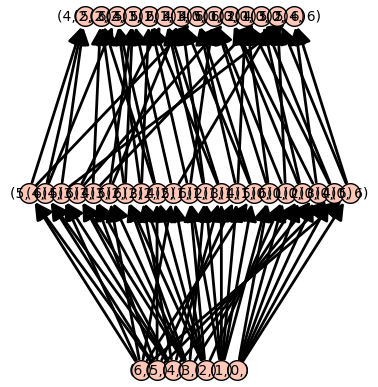

In [13]:
#K = simplicial_complexes.PoincareHomologyThreeSphere()
#K = simplicial_complexes.Sphere(2)
K = simplicial_complexes.Torus()
#K = simplicial_complexes.KleinBottle()
X = K.face_poset()
X.show()

In [3]:
len(X)

42

In [14]:
def regular_Morse_reduction(K, all_cells, critical_cells=None, sigma=None, P=None):
    """
    Recursive function to perform Morse core reduction on a simplicial complex.
    
    Parameters:
    - K: regular CW-complex to be reduced.
    - critical_cells: list of critical cells
    - sigma: acyclic matching.
    
    Returns:
    - Final reduced complex and critical cells.
    """
    X = K.face_poset()
    if critical_cells is None:
        critical_cells = []  # critical_cells
    
    if sigma is None:
        sigma = []  # matching
    
    if P is None:
        P = {}

        # Initialize flow posets P(w, z) for each pair of cells w and z as entrance path posets
        for w in X:
            for z in X:
                if X.is_less_than(w, z):
                    P[(w, z)] = entrance_path_poset(X, w, z)
                else:
                    P[(w, z)] = Poset(([], [])) 
    
    
    for x in X.maximal_elements():
        for y in X.lower_covers(x):
            if len(X.upper_covers(y))==1:
                candidate = [y, x]
    

            # check regularity
            P_aux = deepcopy(P)
            
            updated_pairs = []
            regular = True

            updated_pairs = []
            regular = True  # Assume the structure is regular initially

            for (x, y) in matching:
                for w in all_cells:
                    if w != x and len(P_aux[(w, y)]) != 0:  # If P(w, y) is non-empty
                        for z in all_cells:
                            if z != y and len(P_aux[(x, z)]) != 0:  # If P(x, z) is non-empty
                                # Update P(w, z) using the 'adjoin' operation
                                P_aux[(w, z)] = adjoin(
                                    P_aux[(w, z)], (x, y), P_aux[(w, y)], P_aux[(x, z)], P_aux[(w, x)], P_aux[(y, z)]
                                )
                                updated_pairs.append((w, z))

                                # Check regularity immediately after the update
                                if len(P_aux[(w, z)]) != 0 and not is_collapsible(P_aux[(w, z)]):
                                    print(f'Non-contractible P[{w}, {z}] after update.')
                                    regular = False
                                    break 
                        if not regular:
                            break  
                if not regular:
                    break 
                    
            if regular:
                # update K and sigma
                print(v, 'regular')
                sigma += matching
                K.remove_face((v,))
                
                for p in updated_pairs:
                    P[(p[0], p[1])] = P_aux[(p[0], p[1])]

                # Recursively process the new complex
                return regular_vertex_reduction_aux(K, all_cells, critical_cells, sigma, P)
        
    # No regular collapsible vertex is found, pick a vertex and its open star as critical
    if len(K.vertices()) > 0:
        # Choose a vertex to be critical
        v = next(iter(K.vertices()))  # Pick any vertex from the complex

        print(f"No regular collapsible vertex found, removing critical vertex: {v}")

        # Save the open star of the vertex before removing it
        descending_open_star = X.order_filter([(v,)])
        critical_cells += descending_open_star

        # Remove the vertex from the complex
        K.remove_face((v,))

        # Continue iterating after removing the vertex
        return regular_vertex_reduction_aux(K, all_cells, critical_cells, sigma, P)
    
    # Return the final reduced complex, saved cells, and poset modifications
    return (K, all_cells, critical_cells, sigma, P)

In [5]:
K_red, critical_cells, matching = regular_Morse_vertex_reduction(copy(K))

checking  0
checking  1
checking  2
checking  3
checking  4
checking  5
checking  6
No regular collapsible vertex found, removing critical vertex: 0
checking  1
1 collapsible vertex
checking regularity
1 regular
checking  2
2 collapsible vertex
checking regularity
Non-contractible P[(5,), (1, 5, 6)] after update.
checking  3
checking  4
checking  5
5 collapsible vertex
checking regularity
Non-contractible P[(4,), (1, 5, 6)] after update.
checking  6
No regular collapsible vertex found, removing critical vertex: 2
checking  3
checking  4
checking  5
checking  6
No regular collapsible vertex found, removing critical vertex: 3
checking  4
4 collapsible vertex
checking regularity
Non-contractible P[(5,), (1, 5, 6)] after update.
checking  5
5 collapsible vertex
checking regularity
Non-contractible P[(4,), (1, 5, 6)] after update.
checking  6
6 collapsible vertex
checking regularity
Non-contractible P[(4,), (1, 5, 6)] after update.
No regular collapsible vertex found, removing critical vert

In [6]:
matching

[[(1, 5), (1, 5, 6)],
 [(1, 6), (1, 3, 6)],
 [(1, 3), (1, 3, 4)],
 [(1, 4), (1, 2, 4)],
 [(1,), (1, 2)],
 [(5,), (5, 6)]]

In [7]:
core = Morse_core(X, critical_cells, matching)

In [8]:
len(core)

30

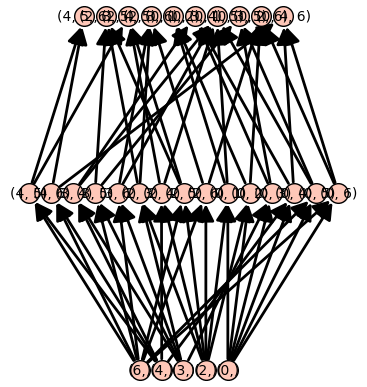

In [9]:
core.show()

In [10]:
core.order_complex().homology()

{0: 0, 1: Z x Z, 2: Z}

In [11]:
core.order_complex().fundamental_group()

Finitely presented group < e2, e4 | e4*e2*e4^-1*e2^-1 >